In [1]:
import os
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import enchant
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import itertools
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.utils import shuffle
import pandas as pd
%matplotlib inline

In [2]:
vectorizer = TfidfVectorizer(stop_words='english', strip_accents='ascii')
initial_categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
                      'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
                      'rec.sport.hockey', 'sci.electronics', 'soc.religion.christian', 'talk.politics.mideast',
                      'talk.politics.misc', 'talk.religion.misc']
eng_dict = enchant.Dict('en_US')
data = pd.read_csv('Data_parse.csv', sep = ',')
text =np.asarray(data.data)
labels=np.asarray(data.title)
text, labels = shuffle(text, labels)
texts_train = text[:320]
texts_test = text[320:]
labels_train = text[:320]
labels_test = text[320:]
print(texts_train.size, texts_test.size,labels_train.size,labels_test.size)

320 80 320 80


In [22]:
#data = pd.DataFrame(np.load("vectorized.npy"), columns = ["data"])
arr = np.load("vectorized.npy")

In [28]:
arr.shape

(298, 9053)

In [13]:
dict_eng = enchant.Dict('en')

df= pd.read_pickle("df")
text =np.asarray(df.text)
labels=np.asarray(df.category)
text, labels = shuffle(text, labels)

texts_train = text[:240]
texts_test = text[240:]
print(len(texts_train), len(texts_test))

240 58


In [14]:
labels_train = labels[:240]
labels_test = labels[240:]

In [82]:
sum = {}
new_labels=[]
new_texts = []
for i in range(0,len(labels[:208])):
    sum[labels[i]] = 0
for i in range(0,len(labels[:208])):
    if((sum[labels[i]]<40)&(labels[i]=='health')):
        sum[labels[i]] +=1
        continue;
    new_labels = labels[i]
    new_texts = text[i]
    sum[labels[i]] +=1
sum

{'asia': 15, 'sport': 47, 'travel': 42, 'health': 104}

In [22]:
sum = {}
new_labels=[]
new_texts = []
for i in range(0,len(labels[:240])):
    sum[labels[i]] = 0
for i in range(0,len(labels[:240])):
    sum[labels[i]] +=1
sum

{'health': 116, 'sport': 57, 'travel': 45, 'asia': 22}

In [94]:
len(new_texts)

168

In [4]:
texts_train[0]
#dict_eng = enchant.Dict('ru_RU')

'(CNN) Horse racing may be the sport of kings, but it is also the business of behemoths.\n\nAll-conquering global stables monopolize the best breeding programs and plunder the best thoroughbreds to keep the conveyor belt rolling.\n\nThese Barcelonas of the equestrian world are all clamoring for the next money-spinning champion and are willing to part with millions for the privilege.\n\nHere are five of the biggest and most successful powerhouses in the world of horse racing.\n\nSheikh Mohammed and his Godolphin operation are among racing\'s powerhouses.\n\nGodolphin\n\nFounded by Dubai\'s ruler, Sheikh Mohammed bin Rashid Al Maktoum, Godolphin has grown into one of the most powerful racing and breeding operations in the world.\n\nSheikh Mohammed, who is also the Prime Minister of the United Arab Emirates, grew up with a love of horses and began his empire in 1992, with the name derived from the Godolphin Arabian, one of the three founding stallions of the modern thoroughbred in the 18t

In [15]:
#чистка
texts_prep_train = []

for text in log_progress(texts_train):
    filtered = re.findall('(?u)\\b\\w\\w+\\b', text)
    filtered = [filt for filt in filtered if dict_eng.check(filt) and filt not in ['s', 't', 'd', 'v', 've', 'll', 're']]
    texts_prep_train.append(' '.join(filtered).lower())
texts_prep_train[0]

'new york cnn pressman raises her hands in triumph the crowd claps in unison and dj cranks up the music the banquet hall on the banks of the hudson pulsates as nine of best friends lead procession to the dance floor it the start of her sweet 16 birthday party celebration not just of her big day but of all that has happened in the past year way for friends and family to express their love became viral sensation months ago after the teen with seizure disorder delivered blunt message to her insurer her two words for screw you expressed the anger she felt at being denied minimally invasive brain surgery that promised to end her seizures her story first told by cnn in december triggered massive uproar and eventually approved the procedure this saturday evening amid the cheers of her closest friends radiates on stage beneath strings of white flashing lights then someone shouts and the dance floor clears everyone rushes outside it as if mother nature has joined the party rainbow stretches fro

In [16]:
texts_prep_test = []

for text in log_progress(texts_test):
    filtered = re.findall('(?u)\\b\\w\\w+\\b', text)
    filtered = [filt for filt in filtered if dict_eng.check(filt) and filt not in ['s', 't', 'd', 'v', 've', 'll', 're']]
    texts_prep_test.append(' '.join(filtered).lower())

In [17]:
vectorizer = TfidfVectorizer(stop_words='english', strip_accents='ascii')

X_train = vectorizer.fit_transform(texts_prep_train)
X_test = vectorizer.transform(texts_prep_test)

print (X_train.shape, X_test.shape)

(240, 15761) (58, 15761)


In [18]:
predictor_lr = LogisticRegression().fit(X_train, labels_train)
y_pred_lr = predictor_lr.predict(X_test)
print ("LR accuracy: {0}%".format(round(np.mean(labels_test == y_pred_lr), 2)))

LR accuracy: 0.79%


c:\users\антон\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\антон\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
labels_train

array(['health', 'health', 'health', 'health', 'health', 'sport', 'sport',
       'health', 'health', 'health', 'health', 'sport', 'health',
       'travel', 'health', 'sport', 'sport', 'sport', 'travel', 'asia',
       'travel', 'travel', 'sport', 'sport', 'health', 'health', 'travel',
       'sport', 'travel', 'travel', 'sport', 'sport', 'health', 'health',
       'health', 'health', 'health', 'sport', 'travel', 'health',
       'travel', 'sport', 'health', 'travel', 'health', 'health',
       'health', 'travel', 'health', 'travel', 'asia', 'asia', 'travel',
       'travel', 'travel', 'sport', 'health', 'travel', 'travel',
       'health', 'sport', 'health', 'health', 'sport', 'health', 'health',
       'health', 'health', 'health', 'sport', 'asia', 'travel', 'health',
       'sport', 'travel', 'health', 'health', 'sport', 'sport', 'health',
       'sport', 'health', 'asia', 'asia', 'health', 'health', 'health',
       'health', 'asia', 'health', 'sport', 'health', 'sport', 'sport',


In [19]:
predictor_svm = LinearSVC().fit(X_train,labels_train)
y_pred_svm = predictor_svm.predict(X_test)
print ("LR accuracy: {0}%".format(round(np.mean(labels_test == y_pred_svm), 2)))

LR accuracy: 0.95%


In [46]:
#binary
predictor_oneVSall = OneVsRestClassifier(LinearSVC(), n_jobs=10).fit(X_train, labels_train)
y_pred_onevsall = predictor_oneVSall.predict(X_test)
print ('One-VS-all accuracy: {0}%'.format(round(np.mean(labels_test == y_pred_onevsall), 2)))

One-VS-all accuracy: 0.88%


In [48]:
ensemble_soft = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='soft', n_jobs=1)

ensemble_hard = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='hard', n_jobs=1)

In [50]:
ensemble_soft.fit(X_train, labels_train)
ensemble_hard.fit(X_train, labels_train)

VotingClassifier(estimators=[('rf_gini_10', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
          ...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [54]:
y_pred_hard = ensemble_hard.predict(X_test)
y_pred_soft = ensemble_soft.predict(X_test)
print ('Hard voting accuracy: {0}%'.format(round(np.mean(labels_test == y_pred_hard), 2)))
print ('Soft voting accuracy: {0}%'.format(round(np.mean(labels_test == y_pred_soft), 2)))

Hard voting accuracy: 0.83%
Soft voting accuracy: 0.88%


In [61]:
from sklearn.naive_bayes import GaussianNB
ensemble_soft = VotingClassifier([('lg', LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='soft', n_jobs=1)

ensemble_hard = VotingClassifier([('lg', LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='hard', n_jobs=1)

In [62]:
ensemble_soft.fit(X_train, labels_train)
ensemble_hard.fit(X_train, labels_train)

VotingClassifier(estimators=[('lg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('gbt_100'...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [63]:
y_pred_hard = ensemble_hard.predict(X_test)
y_pred_soft = ensemble_soft.predict(X_test)
print ('Hard voting accuracy: {0}%'.format(round(np.mean(labels_test == y_pred_hard), 2)))
print ('Soft voting accuracy: {0}%'.format(round(np.mean(labels_test == y_pred_soft), 2)))

Hard voting accuracy: 0.86%
Soft voting accuracy: 0.84%


In [27]:
for i in range(0,len(y_pred_svm)):
    if (y_pred_svm[i]!=labels_test[i]):
        print('========================================================================\n')
        print()
        print(y_pred_svm[i]+' : '+labels_test[i]+'\n')
        print(texts_test[i]+'\n\n')


sport : health

(CNN) Consider the glorious but humble donkey. According to the Bible, Jesus rode one, not a horse, into Jerusalem.

The significance was that it was a common man's animal for the common man's king, rather than a more traditionally royal steed. And its Sunday school lore that his mother rode one from Nazareth while pregnant, though that's not in the official canon. I checked.

Domesticated for about 5,000 years, donkeys have been put to work for humanity's historically changing needs. They've been the family car, our U-Haul vans, engines pulling barges in canals and wagons out West, and they've been our workmates -- if you work in a mine or on a farm. They're still used in military operations to carry ground air missiles over difficult terrain.

Burros, as the Spanish call them, walk at about a human's foot speed. They rarely kick or bite. They seem to have a calming effect on horses and humans. And they don't get nearly the respect they deserve, the Rodney Dangerfield

In [34]:
labels_test[labels_test == 'asia'].size

3

In [32]:
cmt_svm

array([[ 2,  1,  0,  0],
       [ 0, 33,  2,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 10]], dtype=int64)

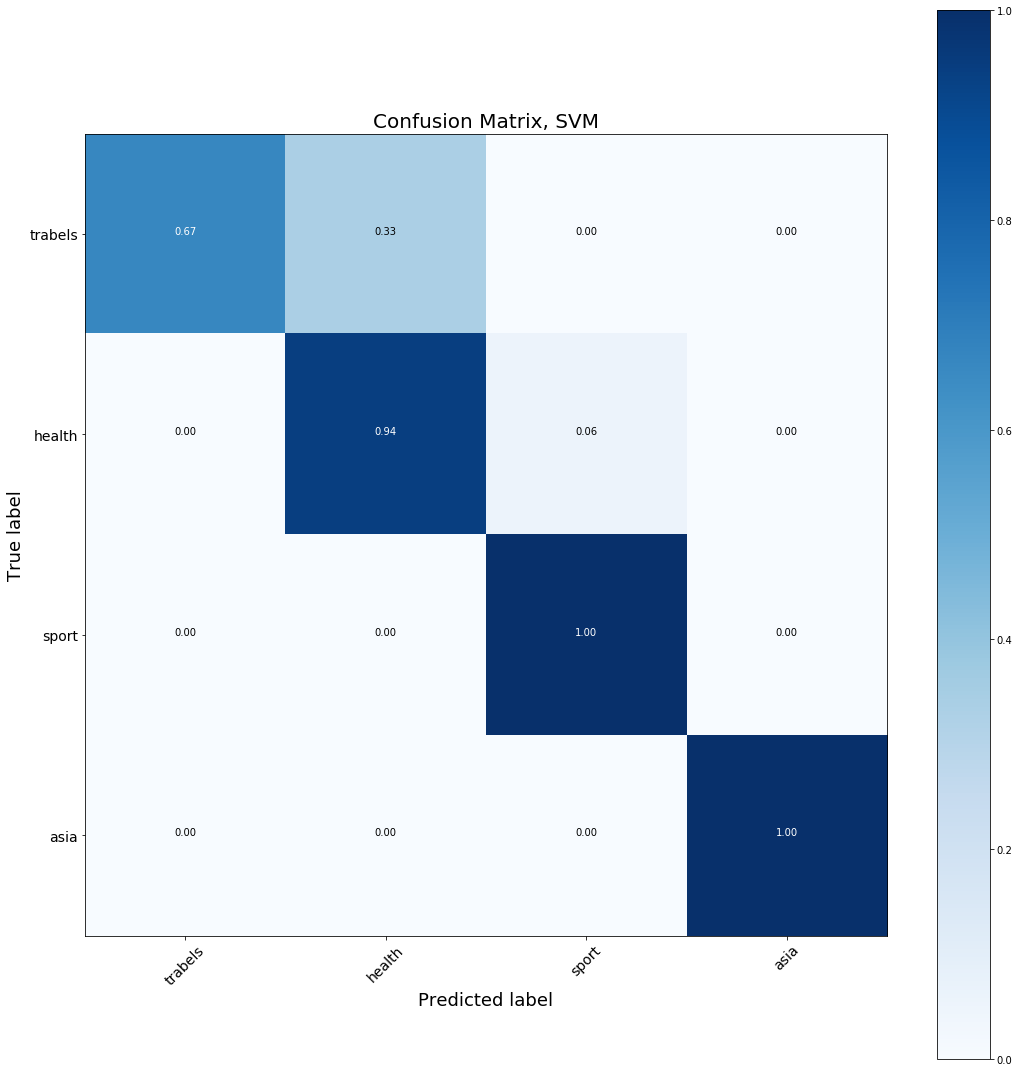

In [28]:
cmt_svm = confusion_matrix(labels_test, y_pred_svm)
plot_confusion_matrix2(cmt_svm, title='Confusion Matrix, SVM')

In [6]:
from sklearn.utils.multiclass import unique_labels


def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

        
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax        

def plot_confusion_matrix2(cm, title='Contingency matrix'):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[0])
    classes = ['trabels','health','sport','asia']
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)